In [1]:
import pandas as pd
import numpy as np


## Loading the Csv File

In [2]:
df=pd.read_csv("./CO2 Emissions_Canada.csv")
df.shape
df.describe()
df.count()
df
df.head()
df["Fuel Type"].value_counts()
df.columns
df.shape
df.columns
df.nunique()
df["Vehicle Class"].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

## Preprocessing the Data

In [3]:
df=df.drop("Fuel Consumption Comb (mpg)",axis="columns")

In [4]:
df.sort_values(by="CO2 Emissions(g/km)", inplace=True)
df
pd.isna(df).sum()
new_cols=[]
for i in df.columns:
    new= i.replace(' (L/100 km)','')
    new_cols.append(new)
df.columns=new_cols
df.head(10)
df.shape
df.nunique()


Make                       42
Model                    2053
Vehicle Class              16
Engine Size(L)             51
Cylinders                   8
Transmission               27
Fuel Type                   5
Fuel Consumption City     211
Fuel Consumption Hwy      143
Fuel Consumption Comb     181
CO2 Emissions(g/km)       331
dtype: int64

In [5]:

df=df.drop("Fuel Consumption Hwy",axis='columns')
df=df.drop("Fuel Consumption City",axis='columns')
df=df.drop("Transmission",axis='columns')
df=df.drop("Model",axis='columns')

df.tail(10)


,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb,CO2 Emissions(g/km)
5126,MERCEDES-BENZ,SUV - STANDARD,6.0,12,Z,20.3,473
2971,MERCEDES-BENZ,SUV - STANDARD,6.0,12,Z,21.4,476
7058,LAMBORGHINI,TWO-SEATER,6.5,12,Z,21.4,485
6045,LAMBORGHINI,TWO-SEATER,6.5,12,Z,21.5,487
349,FORD,VAN - PASSENGER,6.8,10,X,21.2,488
6046,LAMBORGHINI,TWO-SEATER,6.5,12,Z,21.7,493
7059,LAMBORGHINI,TWO-SEATER,6.5,12,Z,21.7,493
5575,BUGATTI,TWO-SEATER,8.0,16,Z,22.2,522
6640,BUGATTI,TWO-SEATER,8.0,16,Z,22.2,522
4509,BUGATTI,TWO-SEATER,8.0,16,Z,22.2,522


# Categorical Encoding :

# the reason we need to convert categorical columns to numerical columns so that a machine learning algorithm understands it. This process is called categorical encoding

In [6]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [7]:
df.drop(['Make','Vehicle Class'], inplace=True, axis=1)
df.rename(columns = {'Make_Type':'Make','Vehicle_Class_Type':"Vehicle Class"}, inplace = True)

In [8]:
df

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb,CO2 Emissions(g/km),Make,Vehicle Class
5931,1.6,4,X,4.1,96,General,Sedan
6950,1.6,4,X,4.1,96,General,Sedan
3824,1.6,4,X,4.1,96,General,Sedan
4900,1.6,4,X,4.1,96,General,Sedan
6949,1.6,4,X,4.2,99,General,Sedan
...,...,...,...,...,...,...,...
6046,6.5,12,Z,21.7,493,Sports,Sedan
7059,6.5,12,Z,21.7,493,Sports,Sedan
5575,8.0,16,Z,22.2,522,Sports,Sedan
6640,8.0,16,Z,22.2,522,Sports,Sedan


In [9]:
#Categorical Dummy Encoding
df_dummies = pd.get_dummies(df[["Fuel Type","Make","Vehicle Class"]])
df_num_features=df.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [10]:
df=df_comb
df.tail(10)
df.to_csv(r'C:\Users\Zbook\Downloads\HomeC_edited2.csv')

## Histograms For Better Understanding 

In [11]:
import matplotlib.pyplot as plt
df.hist(figsize=(50,45))

array([[<AxesSubplot:title={'center':'Engine Size(L)'}>,
        <AxesSubplot:title={'center':'Cylinders'}>,
        <AxesSubplot:title={'center':'Fuel Consumption Comb'}>,
        <AxesSubplot:title={'center':'CO2 Emissions(g/km)'}>],
       [<AxesSubplot:title={'center':'Fuel Type_D'}>,
        <AxesSubplot:title={'center':'Fuel Type_E'}>,
        <AxesSubplot:title={'center':'Fuel Type_N'}>,
        <AxesSubplot:title={'center':'Fuel Type_X'}>],
       [<AxesSubplot:title={'center':'Fuel Type_Z'}>,
        <AxesSubplot:title={'center':'Make_General'}>,
        <AxesSubplot:title={'center':'Make_Luxury'}>,
        <AxesSubplot:title={'center':'Make_Premium'}>],
       [<AxesSubplot:title={'center':'Make_Sports'}>,
        <AxesSubplot:title={'center':'Vehicle Class_Hatchback'}>,
        <AxesSubplot:title={'center':'Vehicle Class_SUV'}>,
        <AxesSubplot:title={'center':'Vehicle Class_Sedan'}>],
       [<AxesSubplot:title={'center':'Vehicle Class_Truck'}>,
        <AxesSubplot:>,

Error in callback <function flush_figures at 0x000002CBE2772DC0> (for post_execute):


KeyboardInterrupt: 

# # Train - Test Spilliting

In [12]:
from sklearn.model_selection import train_test_split
train_set ,test_set =train_test_split(df,test_size=0.2,random_state=42)
print(f"Length of train set  {len(train_set)}")
print(f"Length of train set  {len(test_set)}")
train_set["Cylinders"].value_counts()

Length of train set  5908
Length of train set  1477


4     2557
6     1979
8     1108
12     122
3       80
10      36
5       23
16       3
Name: Cylinders, dtype: int64

## Train-Test Spilliting By using Stratified Shuffled Spilliting


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.2,
                             random_state=42)
for train_index,test_index in sss.split(df,df["Cylinders"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]


In [14]:
strat_train_set["Cylinders"].value_counts()
df=strat_train_set.copy()
df

,Engine Size(L),Cylinders,Fuel Consumption Comb,CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_General,Make_Luxury,Make_Premium,Make_Sports,Vehicle Class_Hatchback,Vehicle Class_SUV,Vehicle Class_Sedan,Vehicle Class_Truck
4557,2.8,4,9.6,257,1,0,0,0,0,1,0,0,0,0,0,0,1
7151,2.5,4,8.2,192,0,0,0,1,0,1,0,0,0,1,0,0,0
6242,2.0,4,9.0,210,0,0,0,0,1,0,0,1,0,1,0,0,0
4395,2.0,4,9.5,223,0,0,0,1,0,0,0,1,0,1,0,0,0
5734,1.4,4,9.4,221,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,3.3,6,11.5,269,0,0,0,1,0,1,0,0,0,0,1,0,0
4786,5.0,8,12.8,300,0,0,0,1,0,1,0,0,0,1,0,0,0
1347,1.8,4,8.3,191,0,0,0,1,0,1,0,0,0,1,0,0,0
4995,2.0,4,8.3,195,0,0,0,1,0,1,0,0,0,0,0,1,0


 ## Looking For Corelations

In [15]:
corr_matrix=df.corr()
corr_matrix["CO2 Emissions(g/km)"].sort_values(ascending=False)

CO2 Emissions(g/km)        1.000000
Fuel Consumption Comb      0.918634
Engine Size(L)             0.852782
Cylinders                  0.834012
Vehicle Class_Truck        0.313436
Fuel Type_Z                0.233195
Make_Sports                0.178955
Make_Luxury                0.145284
Vehicle Class_SUV          0.116333
Make_Premium               0.096181
Fuel Type_E                0.087720
Fuel Type_D               -0.039803
Vehicle Class_Sedan       -0.108882
Vehicle Class_Hatchback   -0.228839
Fuel Type_X               -0.257018
Make_General              -0.257799
Fuel Type_N                     NaN
Name: CO2 Emissions(g/km), dtype: float64

## Scatter Matrix Plot to Understand Coorelations more Effectively

array([[<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='CO2 Emissions(g/km)'>,
        <AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>,
        <AxesSubplot:xlabel='Fuel Consumption Comb', ylabel='CO2 Emissions(g/km)'>],
       [<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>,
        <AxesSubplot:xlabel='Engine Size(L)', ylabel='Engine Size(L)'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>,
        <AxesSubplot:xlabel='Fuel Consumption Comb', ylabel='Engine Size(L)'>],
       [<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Engine Size(L)', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Fuel Consumption Comb', ylabel='Cylinders'>],
       [<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb'>,
        <AxesSubplot:xlabel=

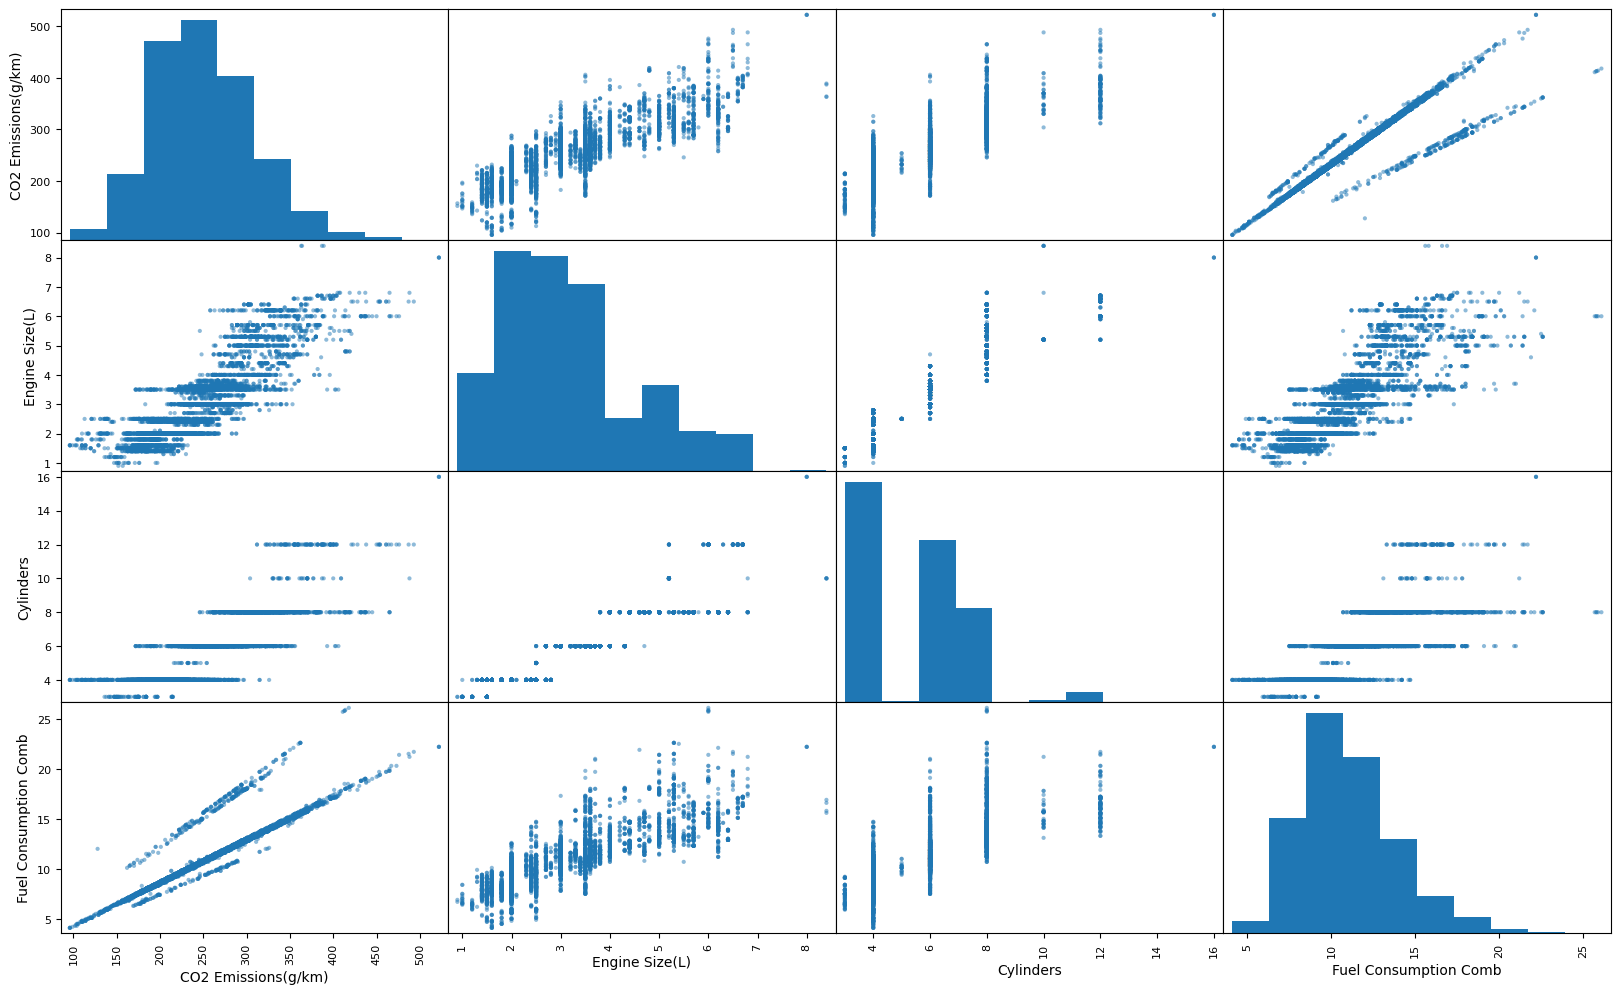

In [16]:
Attributes=["CO2 Emissions(g/km)","Engine Size(L)","Cylinders","Fuel Consumption Comb"]
pd.plotting.scatter_matrix(df[Attributes],figsize=(20,12))

## After Analyzing we come up that CO2 Emissions and Fuel Consumption is very significant so we separate its graph

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb'>

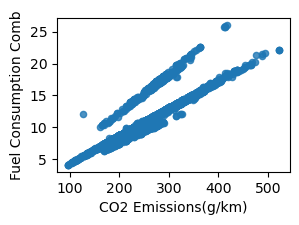

In [17]:
df.plot(kind="scatter" , x='CO2 Emissions(g/km)' , y="Fuel Consumption Comb" , alpha =0.8 ,figsize=(3,2))

 ## Trying Out Different  Attributes To Understand Data More Effectively

In [18]:
df['EmissionsperConsumption']=df["CO2 Emissions(g/km)"]/df["Fuel Consumption Comb"]
df["EmissionsperConsumption"]
df.drop(["EmissionsperConsumption"],axis=1,inplace=True)
df

,Engine Size(L),Cylinders,Fuel Consumption Comb,CO2 Emissions(g/km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_General,Make_Luxury,Make_Premium,Make_Sports,Vehicle Class_Hatchback,Vehicle Class_SUV,Vehicle Class_Sedan,Vehicle Class_Truck
4557,2.8,4,9.6,257,1,0,0,0,0,1,0,0,0,0,0,0,1
7151,2.5,4,8.2,192,0,0,0,1,0,1,0,0,0,1,0,0,0
6242,2.0,4,9.0,210,0,0,0,0,1,0,0,1,0,1,0,0,0
4395,2.0,4,9.5,223,0,0,0,1,0,0,0,1,0,1,0,0,0
5734,1.4,4,9.4,221,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,3.3,6,11.5,269,0,0,0,1,0,1,0,0,0,0,1,0,0
4786,5.0,8,12.8,300,0,0,0,1,0,1,0,0,0,1,0,0,0
1347,1.8,4,8.3,191,0,0,0,1,0,1,0,0,0,1,0,0,0
4995,2.0,4,8.3,195,0,0,0,1,0,1,0,0,0,0,0,1,0


In [19]:
# Distributing data in x and y 
df=strat_train_set.drop("CO2 Emissions(g/km)",axis=1)
df_y=strat_train_set["CO2 Emissions(g/km)"].copy()
test_x=strat_test_set.drop("CO2 Emissions(g/km)",axis=1)
test_y=strat_test_set["CO2 Emissions(g/km)"].copy()
df

,Engine Size(L),Cylinders,Fuel Consumption Comb,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Make_General,Make_Luxury,Make_Premium,Make_Sports,Vehicle Class_Hatchback,Vehicle Class_SUV,Vehicle Class_Sedan,Vehicle Class_Truck
4557,2.8,4,9.6,1,0,0,0,0,1,0,0,0,0,0,0,1
7151,2.5,4,8.2,0,0,0,1,0,1,0,0,0,1,0,0,0
6242,2.0,4,9.0,0,0,0,0,1,0,0,1,0,1,0,0,0
4395,2.0,4,9.5,0,0,0,1,0,0,0,1,0,1,0,0,0
5734,1.4,4,9.4,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,3.3,6,11.5,0,0,0,1,0,1,0,0,0,0,1,0,0
4786,5.0,8,12.8,0,0,0,1,0,1,0,0,0,1,0,0,0
1347,1.8,4,8.3,0,0,0,1,0,1,0,0,0,1,0,0,0
4995,2.0,4,8.3,0,0,0,1,0,1,0,0,0,0,0,1,0


## Feature Scalling

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_tr = scaler.fit_transform(df)
df_tr1=pd.DataFrame(df_tr)
df_tr1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.272619,-0.884155,-0.480575,6.372255,-0.229661,0.0,-0.990901,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,-0.600813,-0.610734,-0.726226,2.736513
1,-0.493365,-0.884155,-0.966728,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,1.664410,-0.610734,-0.726226,-0.365429
2,-0.861274,-0.884155,-0.688926,-0.156930,-0.229661,0.0,-0.990901,1.150322,-0.895415,-0.203078,1.172433,-0.322634,1.664410,-0.610734,-0.726226,-0.365429
3,-0.861274,-0.884155,-0.515300,-0.156930,-0.229661,0.0,1.009182,-0.869322,-0.895415,-0.203078,1.172433,-0.322634,1.664410,-0.610734,-0.726226,-0.365429
4,-1.302765,-0.884155,-0.550025,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,-0.600813,-0.610734,1.376982,-0.365429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,0.095290,0.202960,0.179204,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,-0.600813,1.637375,-0.726226,-0.365429
5904,1.346182,1.290075,0.630631,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,1.664410,-0.610734,-0.726226,-0.365429
5905,-1.008437,-0.884155,-0.932002,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,1.664410,-0.610734,-0.726226,-0.365429
5906,-0.861274,-0.884155,-0.932002,-0.156930,-0.229661,0.0,1.009182,-0.869322,1.116800,-0.203078,-0.852928,-0.322634,-0.600813,-0.610734,1.376982,-0.365429


##  1)Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

0.9918598144646913

## Evaluating The Model Using Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

27.917348146320144

## Using Better Evaluation Technique - Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,df_tr,df_y, cv=9)
scores

array([0.99234838, 0.99290889, 0.98870128, 0.99243254, 0.99143255,
       0.9941778 , 0.99266748, 0.99154293, 0.98987557])

## Cross Validation With Shuffle Split

In [24]:
from sklearn.model_selection import ShuffleSplit
# Making 5 sets of of train and test set
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# Finding out the score for each set with Linear Regression Model
cross_val_score(LinearRegression(), df, df_y, cv=cv, scoring = "r2")

array([0.99371948, 0.99161582, 0.99367464, 0.99229546, 0.99343517,
       0.9929799 , 0.98830465, 0.98976812, 0.9937704 , 0.99264809])

## 2) Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

0.9918644217758704

 ## Evaluating The Model Using Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

27.901547043305083

## Using Better Evaluation Technique - Cross Validation 

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,df_tr,df_y, cv=9)
scores

array([0.99233354, 0.99291726, 0.9887196 , 0.99242569, 0.99144169,
       0.99415686, 0.99265554, 0.99155308, 0.98988194])

## Cross Validation With Shuffle Split

In [28]:
from sklearn.model_selection import ShuffleSplit
# Making 5 sets of of train and test set
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# Finding out the score for each set with Linear Regression Model
cross_val_score(Ridge(), df, df_y, cv=cv, scoring = "r2")

array([0.99365401, 0.99160571, 0.99362269, 0.99226558, 0.99343199,
       0.99297446, 0.98832815, 0.98969842, 0.99375459, 0.99257152])

## 3) Neural Network Regression 


In [29]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

E:\Anaconda folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.995339086686599

## Evaluating The Model Using Mean Squared Error

In [30]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

15.98493536610785

## Using Better Evaluation Technique - Cross Validation  

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,df_tr,df_y, cv=9)
scores

E:\Anaconda folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\Anaconda folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Cross Validation With Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
# Making 5 sets of of train and test set
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# Finding out the score for each set with Linear Regression Model
cross_val_score(MLPRegressor(), df, df_y, cv=cv, scoring = "r2")

## 4) Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## 5) Decision Tree Regression 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)


## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## Using Better Evaluation Technique - Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,df_tr,df_y, cv=9)
scores

## Cross Validation With Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
# Making 5 sets of of train and test set
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# Finding out the score for each set with Linear Regression Model
cross_val_score(DecisionTreeRegressor(), df, df_y, cv=cv, scoring = "r2")

## 6) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## 7) KNN Model 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## 8) Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)

## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## 9. Gaussian Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)


## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## 5) Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(df_tr,df_y)
model.score(df_tr,df_y)


## Evaluating The Model Using Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df_tr)
mean_squared_error(df_y, df_predictions)

## Cross Validation With Shuffle Split

In [ ]:
from sklearn.model_selection import ShuffleSplit
# Making 5 sets of of train and test set
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# Finding out the score for each set with Linear Regression Model
cross_val_score(DecisionTreeRegressor(), df, df_y, cv=cv, scoring = "r2")

## Performing the Predictions 

In [ ]:
# Perform the prediction
predictions_1 = model.predict(df_tr[0:1])
predictions_2 = model.predict(df_tr[1:2])
# Print the predictions
print(f'The first predicted value is {predictions_1}')
print(f'The second predicted value are {predictions_2}')

In [ ]:
df.to_csv('./CO2 Emissions_Canada_Edited.csv')